# Week2 - Predictive Analytics project - Naive Bayes_ Part2
### Chetan Kulkarni


## Naive Bayes on Income of adults 
I will show you how to slice-n-dice the data set from Adult Data Set MLR which contains income data for about 32560 people. We will look at the data and build a machine learning model (a Naive Bayes), which tries to predict if a person will make more than $50K a year, given data like education, gender and martial status.

Let’s first import some libraries that we are going to need for our analysis

### Import the Libraries

In [223]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

### Read the data

In [224]:
data = pd.read_csv("/Users/chetankulkarni/Documents/Python/adult.csv")

In [225]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Exploratory Data Analysis

In [226]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [227]:
data.shape

(32561, 15)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Visualization


Let's first plot a Bar plot for income 

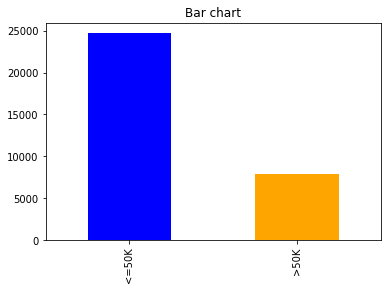

In [229]:
count_Class=pd.value_counts(data["income"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

Based on the above plot we can say salary with <=50k is more compared to salary >50k

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


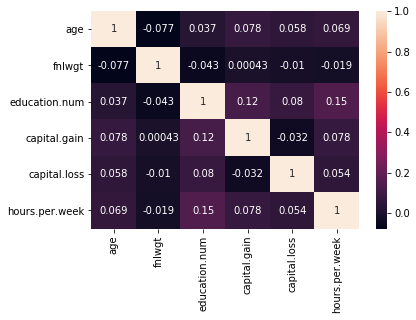

In [230]:
data_corr = data.corr()
sns.heatmap(data=data_corr, annot=True)
print(data.corr())

We see there is a high correlation between Education and Education-Num.

### Data Cleaning

In [231]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no null values but, there are dummy values like '?', which needs to be replaced with NAN first and then use the imputation of forward fill technique to impute the null values

### Make a copy of the data first for cleaning

In [232]:
data_clean = data.copy()

In [233]:
data_clean.replace('?', np.NaN,inplace = True)

In [234]:
# Missing values in workclass, occupation, native-country
data_clean.fillna(method = 'ffill', inplace = True)

In [235]:
data_clean.isna().sum()

age               0
workclass         1
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        1
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [236]:
data_clean = data_clean.dropna()

In [237]:
(data_clean["native.country"].value_counts() / data_clean.shape[0]).head()

United-States    0.912224
Mexico           0.020055
Philippines      0.006143
Germany          0.004300
Canada           0.003778
Name: native.country, dtype: float64

Indeed! 91% of the samples are for people from the US. Mexico comes next with less than 2%.

In [238]:
data_clean[["education", "education.num"]].head(15)

,education,education.num
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10
10,Doctorate,16


We see there is a high correlation between Education and Education-Num. Let’s look at these columns and delete the education column

In [239]:
del data_clean["education"]

So it seems that the data is mostly OK with the exception of Sex and Relationship, which seems to be negatively correlated. Let’s explore that for a bit

In [240]:
data_clean[["sex", "relationship"]].head(15)

,sex,relationship
1,Female,Not-in-family
2,Female,Unmarried
3,Female,Unmarried
4,Female,Own-child
5,Female,Unmarried
6,Male,Unmarried
7,Female,Other-relative
8,Female,Not-in-family
9,Male,Unmarried
10,Female,Unmarried


Yes. The data looks correlated, because for example Male and Husband are highly correlated values, as well as Female and Wife. There is no easy way to tackle this problem, so let’s carry on.

### Removing unwanted columns fnlwgt as it is descrete large number exponential and education - its the same as education-num

In [242]:
data_clean.drop(['fnlwgt'],axis = 1,inplace =True)

In [243]:
data_clean.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


### Target variable has 4 values

In [258]:
data_clean['income'].unique()

array(['<=50K', '>50K'], dtype=object)

### Convert target variable to numeric- binary

In [259]:
data_clean['income'].replace({'<=50K':0,'>50K':1},inplace = True)

In [260]:
data_clean.shape

(32560, 13)

In [261]:
data_clean['income'].tail(5)

32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, dtype: int64

### Check for the data types and convert the data types to dummy variables for modelling

In [270]:
print(data_clean.select_dtypes('int64').columns)

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')


In [271]:
print(data_clean.select_dtypes('object').columns)

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')


### Convert the object data categorical variables into integer variables using get dummies

In [272]:
data_cat = pd.get_dummies(data_clean.select_dtypes('object'),drop_first = True)
data_cat.head(5)
data_num = data_clean.select_dtypes('int64')
df = pd.concat([data_cat,data_num],axis = 1)
df.columns

Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_As

### Load Features and Targets

In [265]:
# define X and y
X = df.drop('income_>50K',axis=1)
y = df['income_>50K']

### Split Train and Test Sets

In [266]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 25)

### Fit Model

In [267]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

### Predict Metric

In [268]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)


print("Classification_report:")
print(classification_report(y_train,y_train_pred))
print('\n')
print("Confusion_matrix:")
print(confusion_matrix(y_train,y_train_pred))
print('\n')
print("Accuracy_score:")
print(accuracy_score(y_train,y_train_pred))

Classification_report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87     19797
           1       0.63      0.22      0.32      6251

   micro avg       0.78      0.78      0.78     26048
   macro avg       0.71      0.59      0.60     26048
weighted avg       0.75      0.78      0.74     26048



Confusion_matrix:
[[18987   810]
 [ 4891  1360]]


Accuracy_score:
0.781134828009828


In [269]:
# Test data
print("Classification_report:")
print(classification_report(y_test,y_pred))
print('\n')
print("Confusion_matrix:")
print(confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy_score:")
print(accuracy_score(y_test,y_pred))

Classification_report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.83      4922
           1       0.22      0.07      0.11      1590

   micro avg       0.71      0.71      0.71      6512
   macro avg       0.48      0.49      0.47      6512
weighted avg       0.62      0.71      0.65      6512



Confusion_matrix:
[[4502  420]
 [1474  116]]


Accuracy_score:
0.7091523341523341


## Conclusion

Understandably, naive Bayes performance accuracy to 78% and it is not that good because of the conditional independence assumption.

Prediction  <=50K  >50K
      <=50K  18987  810
       >50K   4891  1360

- Looking at the table, we can see that a total of 4891 + 810 = 5701 of the 26048 data were incorrectly classified (21.88 percent), hence, we can say naive Bayes performance is not that great.

Further Steps: Improving model performance
Use more training data, here we used 80-20 train test data, we can use more training data and could model